In [12]:
"""
Date: 24 January 2022

Author: Sinan Deger

"""

import os
import sys
from os import path
"""Import the basics; numpy, pandas, matplotlib et al."""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
"""Import scikit learn tools"""
from sklearn.manifold import TSNE

This tutorial uses the same catalog that was generated for the random forest classifier example. However, as this tutorial focuses on an unsupervised learning algorithm, we exclude the labels pointing to the morphological classes of the sample galaxies from the analysis that follows.

In [13]:
"""Read the morphology and the partial CANDELS GOODS-S merged catalog"""
cwd = os.getcwd()
morph_df_base = pd.read_csv(cwd+'/data/AAS237_morphology_catalog.csv')
"""Select only the galaxies for which statmorph does not raise a flag for the Sersic fit"""
morph_df_qa = morph_df_base.loc[morph_df_base['sersic_flag'] == 0].copy()

"""Next, we select the columns/parameters we would like to use with t-SNE.
These parameters are the same ones used in the random forest classifier example to perform the
morphological classification of the galaxy sample."""
feature_columns = ['C', 'A', 'S', 'r20', 'r80', 'sersic_index', 'rhalf_circ', 'rhalf_ellip']
morph_df = morph_df_qa.dropna().copy()

X_df = morph_df[feature_columns].copy()
X = X_df.values

Below we apply an unsupervised learning algorithm called "t-distributed Stochastic Neighbor Embedding" (t-SNE, Van der Maaten & Hinton 2008, lvdmaaten.github.io/tsne/) on the catalog comprised of quantitative morphology metrics. t-SNE is a dimensionality reduction technique that is widely used in the visualizations of high-dimensional data. 

Very briefly, t-SNE attempts to find a low-dimensional embedding of high-dimensional data that preserves the relationship among different points in the original space. The "cost" of the low-dimensional representation can be measured by the Kullback-Leibler (KL) divergence. The KL divergence is a measure of the difference between two probability distributions Q(x) and P(x). KL divergence of Q(x) from P(x) is a measure of the loss sustained or information lost when P(x) is approximated by Q(x).

Warning from the scikit-learn t-SNE library webpage: "It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high."

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1775 samples in 0.001s...
[t-SNE] Computed neighbors for 1775 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1775
[t-SNE] Computed conditional probabilities for sample 1775 / 1775
[t-SNE] Mean sigma: 0.184815
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 72.2911072, gradient norm = 0.0983165 (50 iterations in 0.551s)
[t-SNE] Iteration 100: error = 71.9864273, gradient norm = 0.0672774 (50 iterations in 0.633s)
[t-SNE] Iteration 150: error = 71.7481155, gradient norm = 0.0584997 (50 iterations in 0.613s)
[t-SNE] Iteration 200: error = 71.5497437, gradient norm = 0.0532255 (50 iterations in 0.617s)
[t-SNE] Iteration 250: error = 71.3585587, gradient norm = 0.0500518 (50 iterations in 0.604s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.358559
[t-SNE] Iteration 300: error = 1.6982630, gradient norm = 0.0018719 (50 iterations in 0.465s)

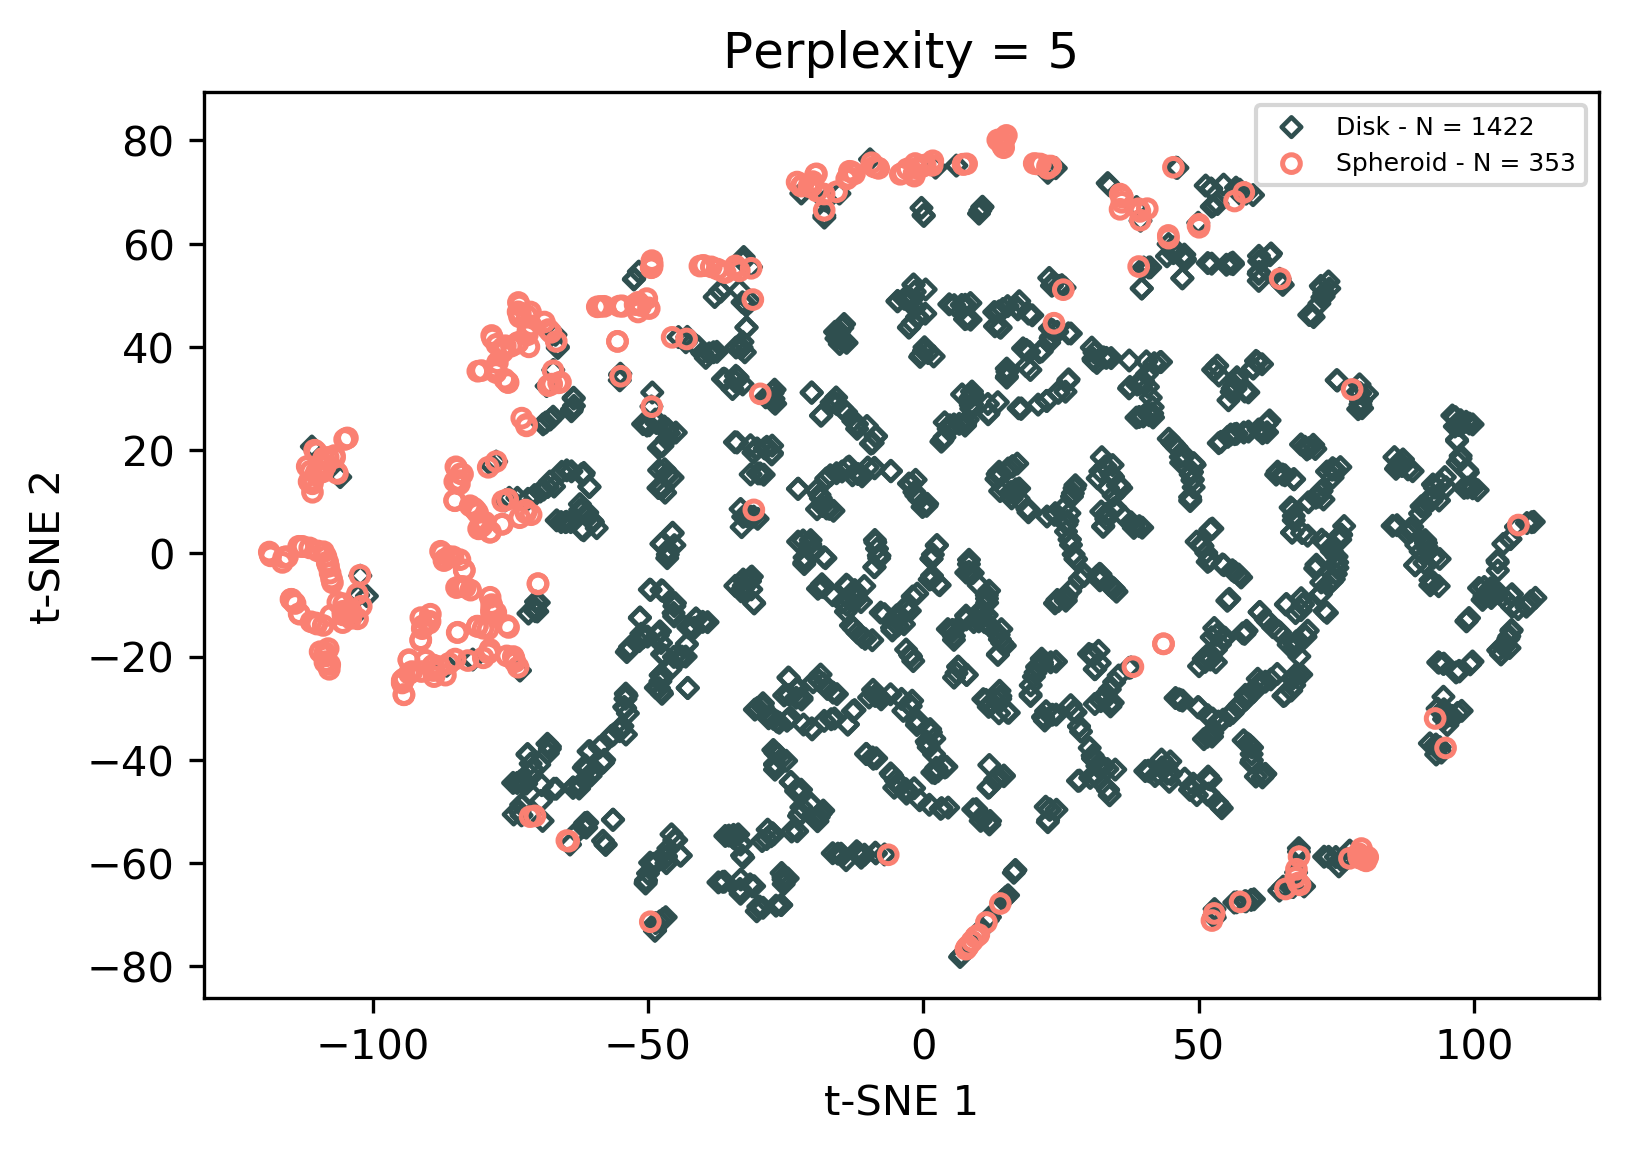

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1775 samples in 0.001s...
[t-SNE] Computed neighbors for 1775 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1775
[t-SNE] Computed conditional probabilities for sample 1775 / 1775
[t-SNE] Mean sigma: 0.246255
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 67.0846634, gradient norm = 0.0339834 (50 iterations in 0.664s)
[t-SNE] Iteration 100: error = 67.3264923, gradient norm = 0.0189849 (50 iterations in 0.730s)
[t-SNE] Iteration 150: error = 67.4054108, gradient norm = 0.0123025 (50 iterations in 0.741s)
[t-SNE] Iteration 200: error = 67.4474258, gradient norm = 0.0084718 (50 iterations in 0.781s)
[t-SNE] Iteration 250: error = 67.4722061, gradient norm = 0.0124023 (50 iterations in 0.805s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.472206
[t-SNE] Iteration 300: error = 1.4441383, gradient norm = 0.0013966 (50 iterations in 0.555s)

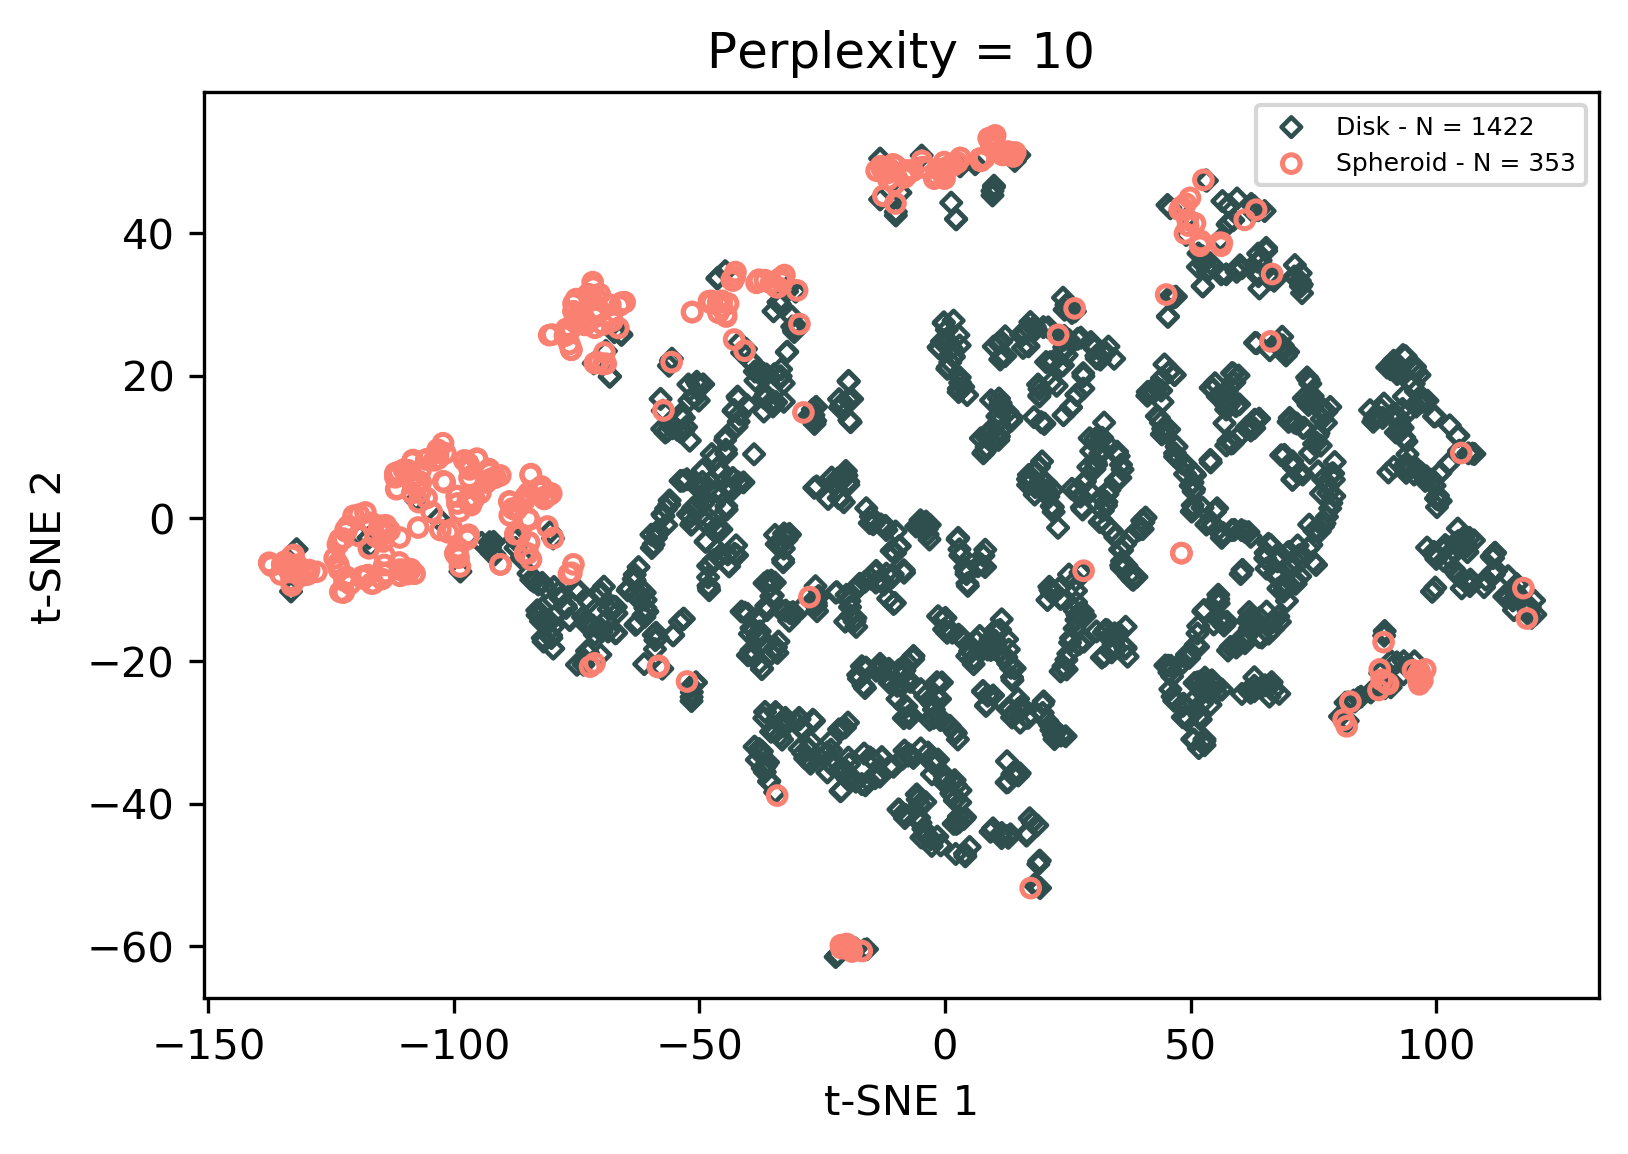

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1775 samples in 0.001s...
[t-SNE] Computed neighbors for 1775 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1775
[t-SNE] Computed conditional probabilities for sample 1775 / 1775
[t-SNE] Mean sigma: 0.376053
[t-SNE] Computed conditional probabilities in 0.097s
[t-SNE] Iteration 50: error = 58.2293320, gradient norm = 0.0346189 (50 iterations in 0.906s)
[t-SNE] Iteration 100: error = 59.5074768, gradient norm = 0.0263796 (50 iterations in 1.062s)
[t-SNE] Iteration 150: error = 60.2546844, gradient norm = 0.0140552 (50 iterations in 1.032s)
[t-SNE] Iteration 200: error = 60.6871605, gradient norm = 0.0112695 (50 iterations in 1.098s)
[t-SNE] Iteration 250: error = 60.9159546, gradient norm = 0.0037611 (50 iterations in 1.061s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.915955
[t-SNE] Iteration 300: error = 1.0478117, gradient norm = 0.0008654 (50 iterations in 0.766s)

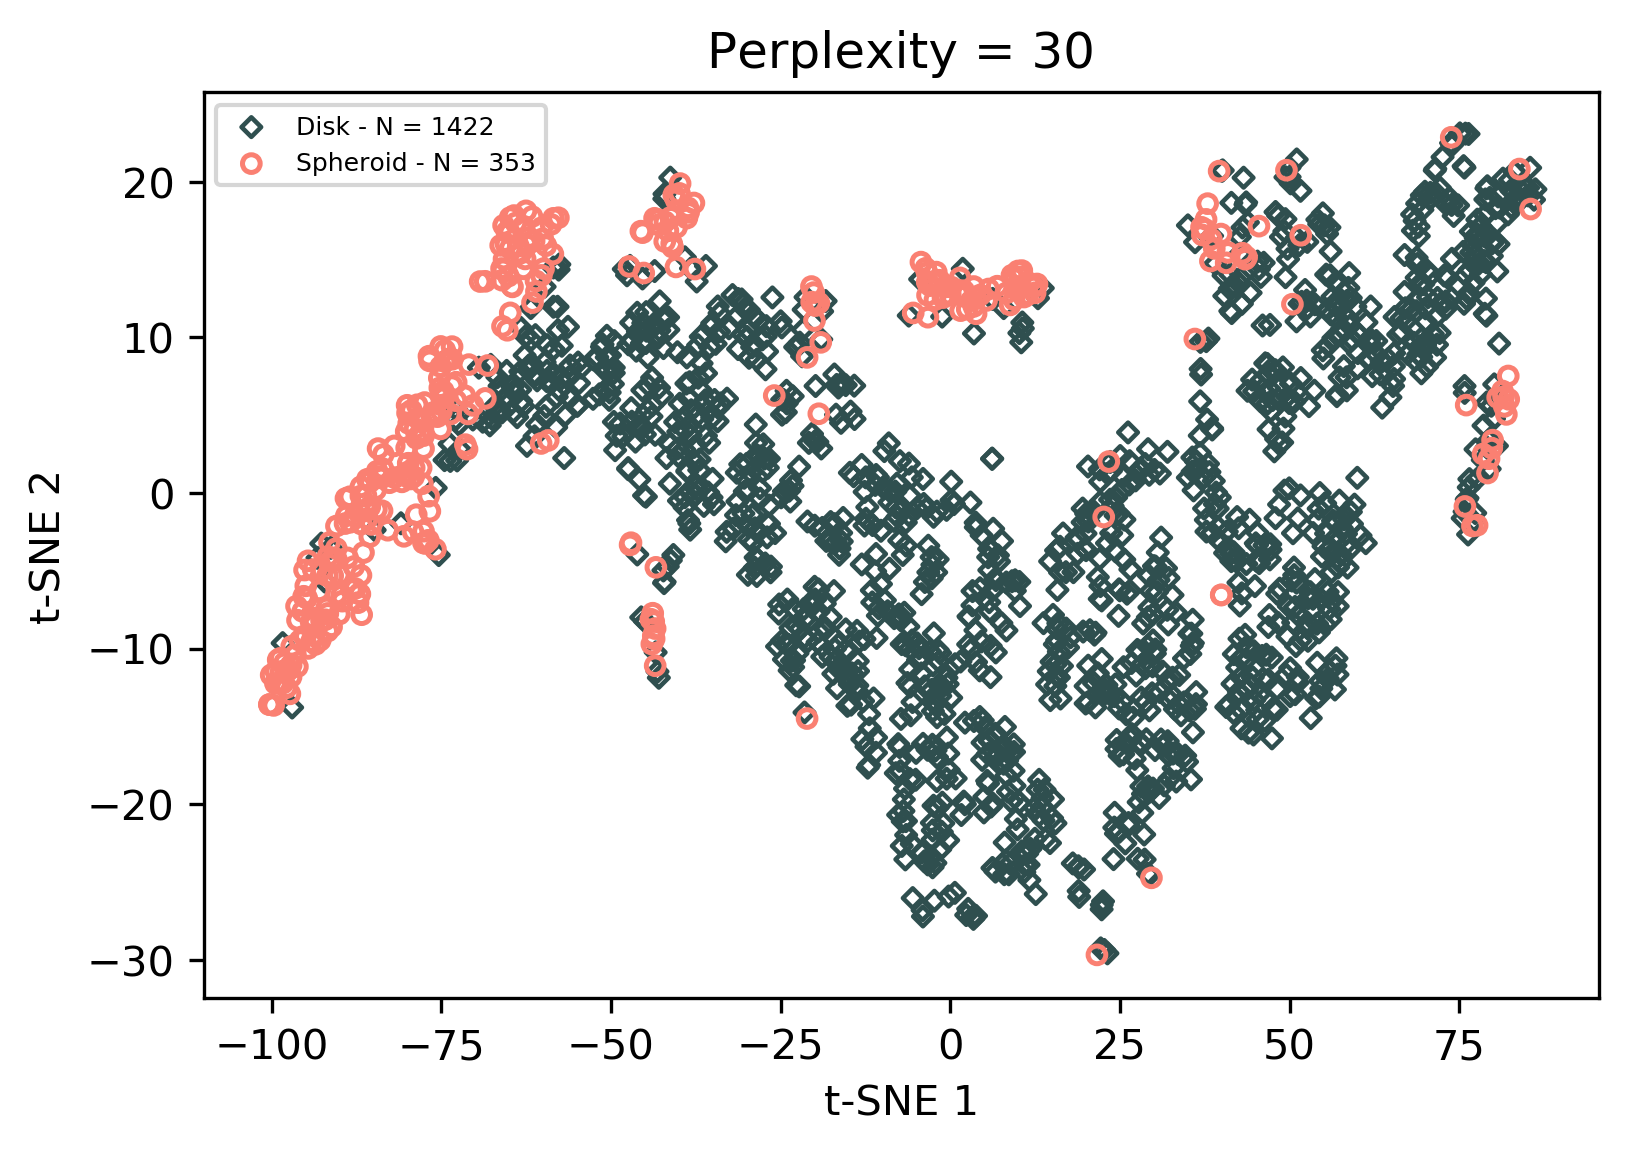

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1775 samples in 0.001s...
[t-SNE] Computed neighbors for 1775 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1775
[t-SNE] Computed conditional probabilities for sample 1775 / 1775
[t-SNE] Mean sigma: 0.467566
[t-SNE] Computed conditional probabilities in 0.146s
[t-SNE] Iteration 50: error = 54.0823746, gradient norm = 0.0379134 (50 iterations in 0.856s)
[t-SNE] Iteration 100: error = 55.8717537, gradient norm = 0.0195936 (50 iterations in 0.727s)
[t-SNE] Iteration 150: error = 56.6991844, gradient norm = 0.0087018 (50 iterations in 0.623s)
[t-SNE] Iteration 200: error = 57.0128326, gradient norm = 0.0025547 (50 iterations in 0.603s)
[t-SNE] Iteration 250: error = 57.1227608, gradient norm = 0.0017658 (50 iterations in 0.629s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.122761
[t-SNE] Iteration 300: error = 0.8441554, gradient norm = 0.0010284 (50 iterations in 0.932s

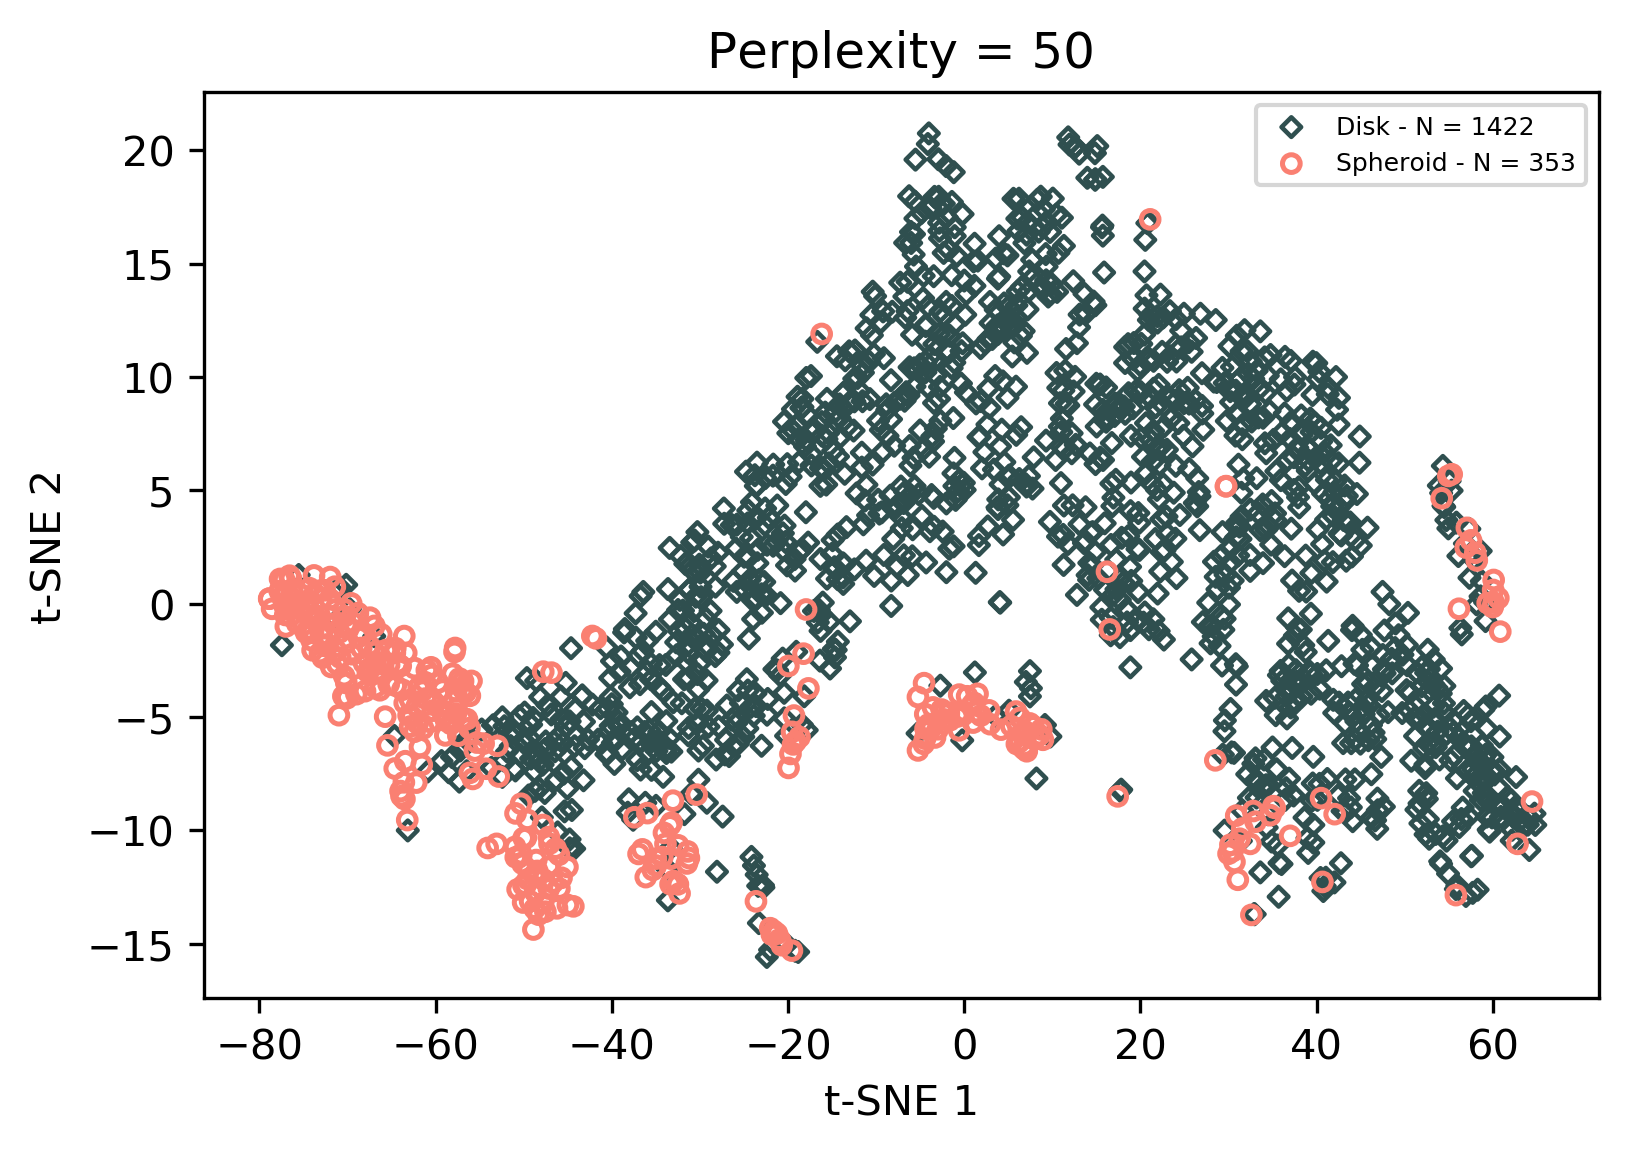

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1775 samples in 0.001s...
[t-SNE] Computed neighbors for 1775 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1775
[t-SNE] Computed conditional probabilities for sample 1775 / 1775
[t-SNE] Mean sigma: 0.658067
[t-SNE] Computed conditional probabilities in 0.251s
[t-SNE] Iteration 50: error = 49.2089081, gradient norm = 0.0352284 (50 iterations in 0.904s)
[t-SNE] Iteration 100: error = 51.3297653, gradient norm = 0.0124513 (50 iterations in 0.714s)
[t-SNE] Iteration 150: error = 51.7326660, gradient norm = 0.0088626 (50 iterations in 0.656s)
[t-SNE] Iteration 200: error = 51.7991524, gradient norm = 0.0010337 (50 iterations in 0.633s)
[t-SNE] Iteration 250: error = 51.8008537, gradient norm = 0.0006444 (50 iterations in 0.627s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.800854
[t-SNE] Iteration 300: error = 0.5596240, gradient norm = 0.0009314 (50 iterations in 1.048s

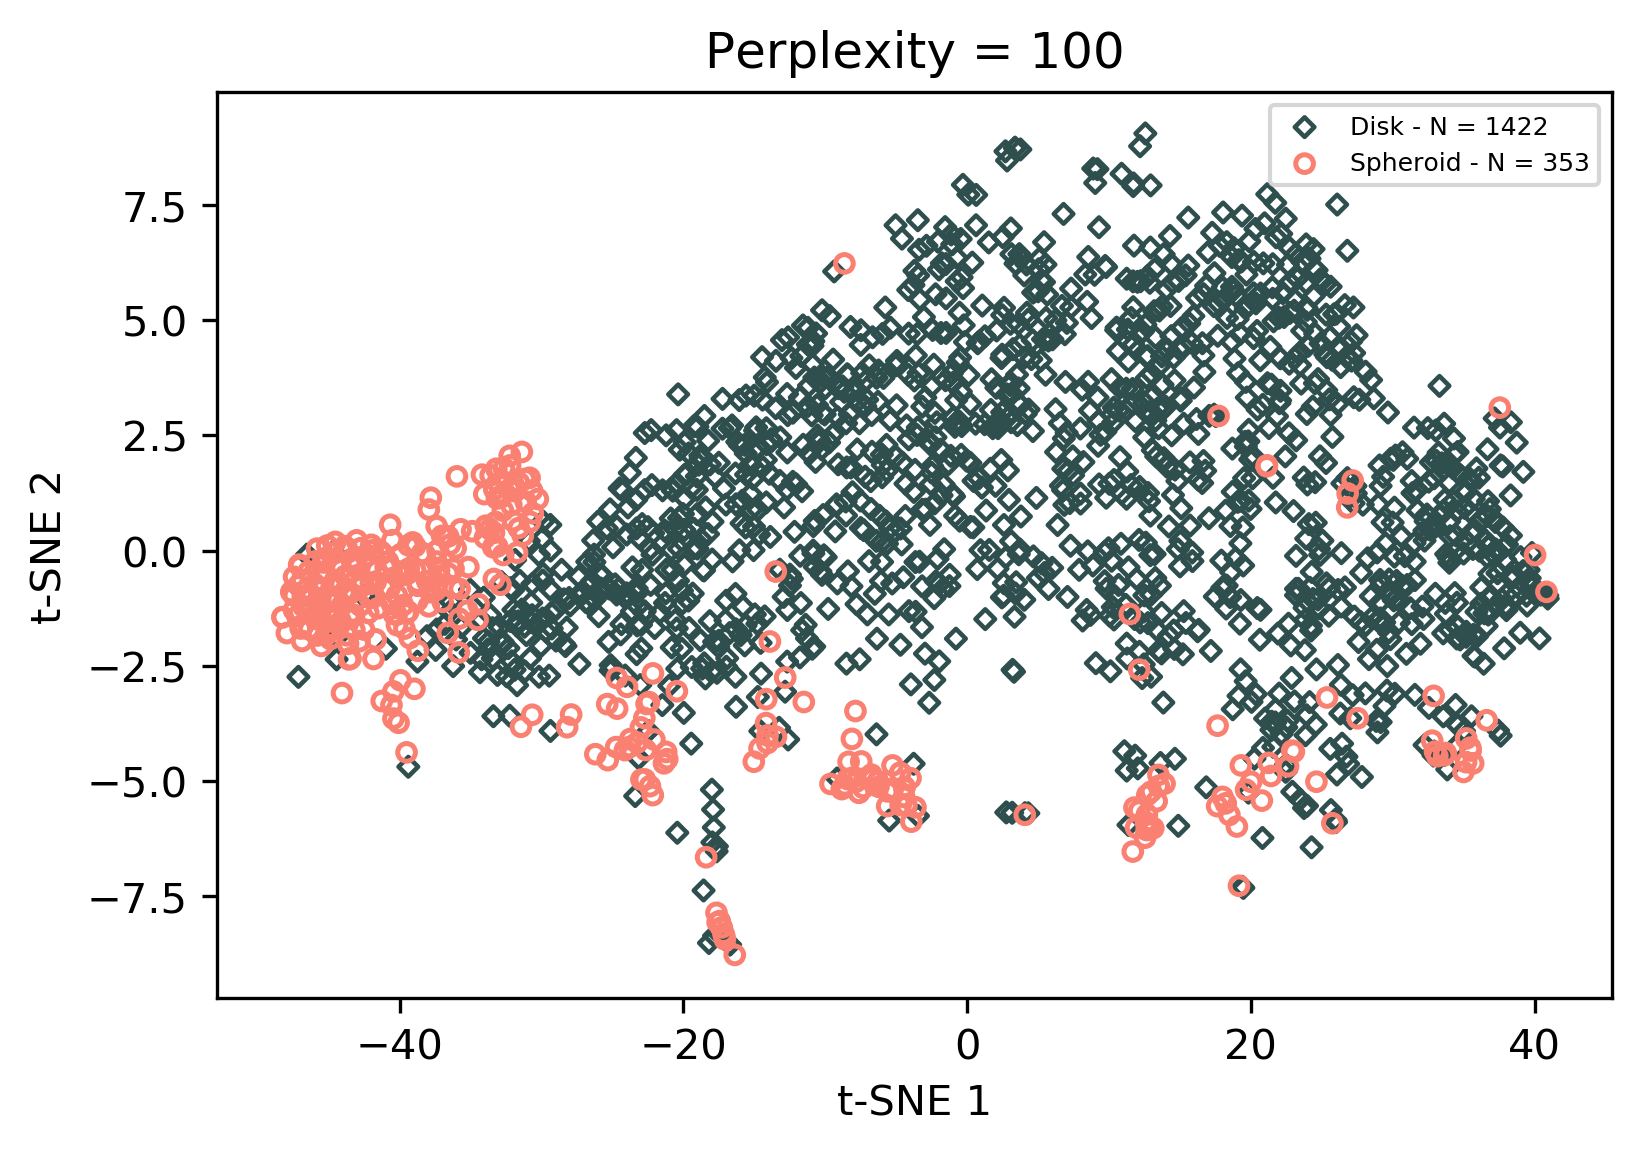

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 1775 samples in 0.001s...
[t-SNE] Computed neighbors for 1775 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1775
[t-SNE] Computed conditional probabilities for sample 1775 / 1775
[t-SNE] Mean sigma: 0.982109
[t-SNE] Computed conditional probabilities in 0.505s
[t-SNE] Iteration 50: error = 45.8637161, gradient norm = 0.0217090 (50 iterations in 1.236s)
[t-SNE] Iteration 100: error = 46.8988190, gradient norm = 0.0009956 (50 iterations in 0.965s)
[t-SNE] Iteration 150: error = 46.9286423, gradient norm = 0.0001227 (50 iterations in 0.903s)
[t-SNE] Iteration 200: error = 46.9298401, gradient norm = 0.0001261 (50 iterations in 0.868s)
[t-SNE] Iteration 250: error = 46.9297829, gradient norm = 0.0000840 (50 iterations in 0.849s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.929783
[t-SNE] Iteration 300: error = 0.3184648, gradient norm = 0.0009166 (50 iterations in 1.122s

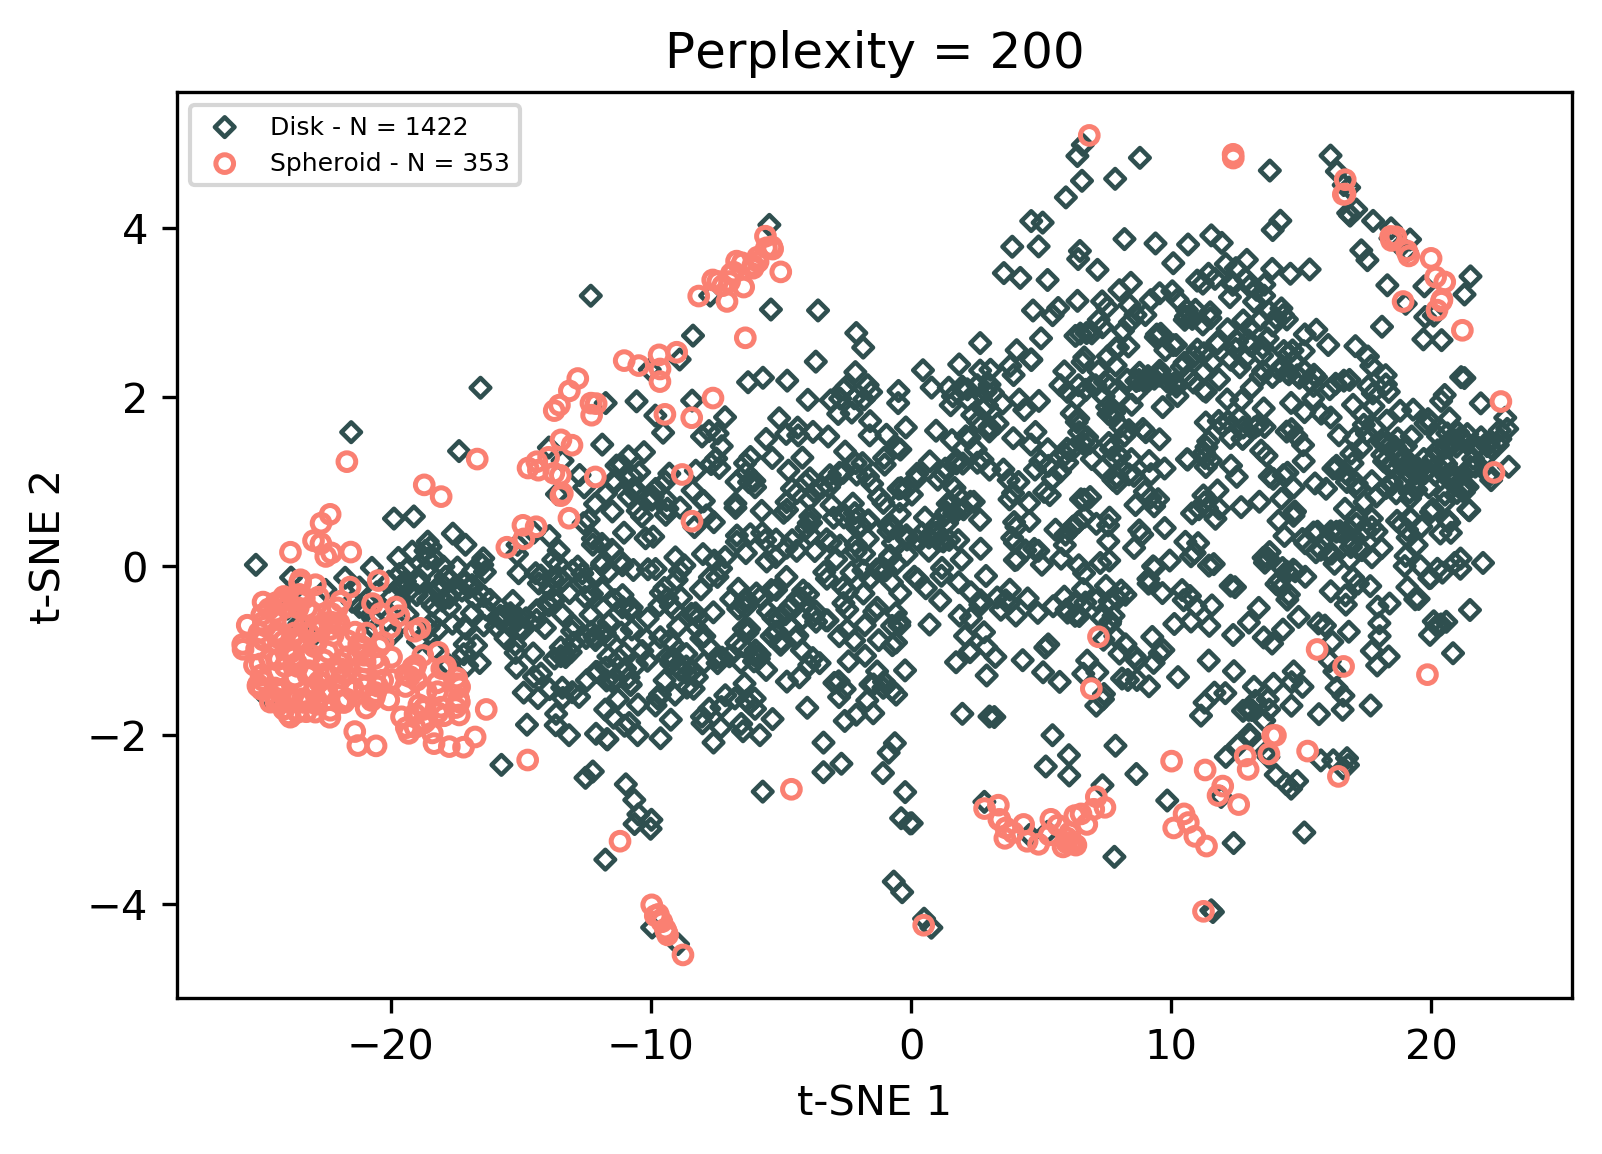

In [19]:
"""
We apply t-SNE within the loop below. The loop walks through the list of perplexity values defined within
perplexity_list. Very briefly, the parameters we use in the t-SNE call are:

perplexity: a parameter that controls the number of effective nearest neighbors.
From Van der Maaten's FAQ: "Loosely speaking, one could say that a larger / denser dataset
requires a larger perplexity. Typical values for the perplexity range between 5 and 50."

n_components: the dimensions of the embedded space. 

init: initialization of the embedding. 'pca' stands for principal component analysis (will be the default
in upcoming versions of scikit-learn t-SNE)

Visit https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for other parameters 
you can access.

"""

perplexity_list = [5, 10, 30, 50, 100, 200]
number_of_iterations = 1000  # scikit-learn default value
n_components = 2   # dimensions of the t-SNE embedded space
lr = 200.0   # again, scikit-learn default value

for perp in perplexity_list:

    """Run t-SNE according to the specifications we've set above"""
    data_encoded = TSNE(n_components=n_components, n_iter=number_of_iterations, perplexity=perp,
                        learning_rate=lr, init='pca', verbose=5).fit_transform(X)
    """Append the t-SNE results per perplexity as a column to our original data frame"""
    morph_df['tsne_1_perplexity_' + str(perp)] = data_encoded[:, 0]
    morph_df['tsne_2_perplexity_' + str(perp)] = data_encoded[:, 1]
    """Plot the embedded space"""
    fig, ax = plt.subplots()
    tsne_figure_disk = ax.scatter(morph_df.loc[morph_df['morphology'] == 1]['tsne_1_perplexity_' + str(perp)],
                                  morph_df.loc[morph_df['morphology'] == 1]['tsne_2_perplexity_' + str(perp)],
                                  edgecolors='darkslategray', s=11, marker='D', facecolors='none', linewidth=1.1,
                                  label='Disk - N = '+str(morph_df.loc[morph_df['morphology'] == 1].shape[0]))

    tsne_figure_sph = ax.scatter(morph_df.loc[morph_df['morphology'] == 0]['tsne_1_perplexity_' + str(perp)],
                                 morph_df.loc[morph_df['morphology'] == 0]['tsne_2_perplexity_' + str(perp)],
                                 edgecolors='salmon', s=18, marker='o', facecolors='none', linewidth=1.2,
                                 label='Spheroid - N = '+str(morph_df.loc[morph_df['morphology'] == 0].shape[0]))

    plt.title('Perplexity = '+str(perp))
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(loc='best', prop={'size': 6})
    # plt.savefig('t-sne_morph_parameters_perp-'+str(perp)+'.pdf', type='pdf')
    plt.show()
    plt.close()